In [1]:
### EDA for final project
### Videogames from 1980-2023
# Claudia Mattes
#github: claudiamattes98

In [2]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect

[Data Source](https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023/)

In [3]:
#### documentation
# I found the dataset on Kaggle via the google datset search https://datasetsearch.research.google.com/search?src=3&query=video%20games&docid=L2cvMTF0eGoyeDJkYg%3D%3D
# It's an open source dataset created by webscraping backloggd.com

# I chose this dataset because videogames are one of my hobbies and I saw that the data provided could be used to try out a number of ways to work with data in python
# some of them I already worked a bit with (simple NLprocessing), others I have no experience in (webscraping, geoplotting, plotting in general, maybe some stats, AI prompts)
# so it's more of a personal interest that made me choose the particular dataset, but I'm hoping to train some skills that will be useful for research endeavours in the future.
# I don't know how ambitious the plans are that I made for the final project so far, but I will talk about them throughout the notebook


# the documentation on the dataset itself is not the best and the datatypes for the different columns are not the right ones, so after importing I will need to spend time to fix this

<h4> Importing the data, cleaning

In [4]:
#import dataframe from csv using the ID column as index
games = pd.read_csv('games.csv', index_col=0)
games.head()


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [5]:
#looking at the datatypes of the columns
games_shape = games.shape
print(games_shape)
games_info = games.info()
print(games_info)

(1512, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB
None


In [6]:
#Null datapoints in the dataset
print(games.isnull().sum())

Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64


In [7]:
#how do we deal with the null datapoints? 1 in team and quite a few in Rating (I'm not looking at the text columns yet, because those will only be relevant later)
nan_rating = games[games['Rating'].isnull()]
nan_rating.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437


In [8]:
#furthermore we have 'releases on tbd' in the Release Date column, so videogames who don't even have a decided release date yet
release_tbd = games[games['Release Date'] == 'releases on TBD']
release_tbd

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
644,Deltarune,releases on TBD,['tobyfox'],4.3,313,313,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']","UNDERTALE's parallel story, DELTARUNE. Meet ne...","['Spamton is so hot, I want to kiss him in the...",1.3K,83,468,617
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
1252,Elden Ring: Shadow of the Erdtree,releases on TBD,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18,18,"['Adventure', 'RPG']",An expansion to Elden Ring setting players on ...,['I really loved that they integrated Family G...,1,0,39,146


In [9]:
# I'm gonna leave the ratings as NaN, because the games were not yet released at the time of the compilation of the dataset
# an idea would be to get rid of all the rows of games released after 1.1.2023 because that would get rid of all the NaN all together

In [10]:
# to clean up the dataframe using the release date, i will need to transform this column first
# release date is an object right now, we need to transfer it into a readable date
games['Release Date'] = pd.to_datetime(games['Release Date'], errors='coerce')
games['Release Date'].isnull().sum()
# the three null datapoints are the games without the release date.

3

In [11]:
#drop the rows of games from 2023 to get rid of the NaN
games = games[games['Release Date'] < '2023-01-01']
games.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [12]:
#now we check for null datapoints again
print(games.isnull().sum())
#and see that there are no more left except for one in team

Title                0
Release Date         0
Team                 1
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64


In [13]:
nan_team = games[games['Team'].isnull()]
nan_team

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1245,NEET Girl Date Night,2022-10-21,NaN,2.7,21,21,['Visual Novel'],Your friend sets you up on a date with his NEE...,"['this sucked. ""Omg she is literally me"" is no...",106,1,44,42


In [14]:
#so i looked up the Team that made the game and filled in the datapoint
games.loc[1245, 'Team'] = ['Hitsuji']
games.loc[1245, :]

Title                                             NEET Girl Date Night
Release Date                                       2022-10-21 00:00:00
Team                                                         [Hitsuji]
Rating                                                             2.7
Times Listed                                                        21
Number of Reviews                                                   21
Genres                                                ['Visual Novel']
Summary              Your friend sets you up on a date with his NEE...
Reviews              ['this sucked. "Omg she is literally me" is no...
Plays                                                              106
Playing                                                              1
Backlogs                                                            44
Wishlist                                                            42
Name: 1245, dtype: object

In [15]:
#let's continue with the datatransformation
#transforming K to number so we can work with it in calculations and plot
#I don't need to transform 'Rating' because this column is already and correctly the datatype float
numeric_columns = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']
games_to_numeric = games[numeric_columns].applymap(lambda number: number.replace('K', 'e3'))

#convert to integer
games_to_numeric = games_to_numeric[numeric_columns].apply(pd.to_numeric, downcast='integer')
games_to_numeric.head()

,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
0,3900,3900,17000,3800,4600,4800
1,2900,2900,21000,3200,6300,3600
2,4300,4300,30000,2500,5000,2600
3,3500,3500,28000,679,4900,1800
4,3000,3000,21000,2400,8300,2300


In [16]:
#replace the columns
games[numeric_columns] = games_to_numeric[numeric_columns]
games.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300


In [17]:
#check the datatypes again
games_info = games.info()
print(games_info)
# now all the columns containing numbers have been transformed into the proper data type

<class 'pandas.core.frame.DataFrame'>
Index: 1469 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1469 non-null   object        
 1   Release Date       1469 non-null   datetime64[ns]
 2   Team               1469 non-null   object        
 3   Rating             1469 non-null   float64       
 4   Times Listed       1469 non-null   int16         
 5   Number of Reviews  1469 non-null   int16         
 6   Genres             1469 non-null   object        
 7   Summary            1469 non-null   object        
 8   Reviews            1469 non-null   object        
 9   Plays              1469 non-null   int32         
 10  Playing            1469 non-null   int16         
 11  Backlogs           1469 non-null   int16         
 12  Wishlist           1469 non-null   int16         
dtypes: datetime64[ns](1), float64(1), int16(5), int32(1), object(5)
memo

<h4> Some Boxplots and Graphs visualizing the numeric data

In [18]:
# I want to visualized the numeric columns
boxplots = games.describe()
boxplots

,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,1469,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000
mean,2012-06-03 10:09:43.253914112,3.720490,784.197413,784.197413,6418.984343,269.180395,1481.672566,775.630361
min,1980-05-22 00:00:00,0.700000,8.000000,8.000000,8.000000,0.000000,9.000000,2.000000
25%,2007-03-29 00:00:00,3.400000,296.000000,296.000000,1900.000000,44.000000,482.000000,212.000000
50%,2014-03-18 00:00:00,3.800000,566.000000,566.000000,4400.000000,115.000000,1000.000000,494.000000
75%,2019-04-26 00:00:00,4.100000,1000.000000,1000.000000,9200.000000,301.000000,2100.000000,1100.000000
max,2022-12-15 00:00:00,4.600000,4300.000000,4300.000000,33000.000000,3800.000000,8300.000000,4800.000000
std,NaN,0.522982,690.966362,690.966362,5897.876347,429.486630,1348.088729,794.738761


<Axes: >

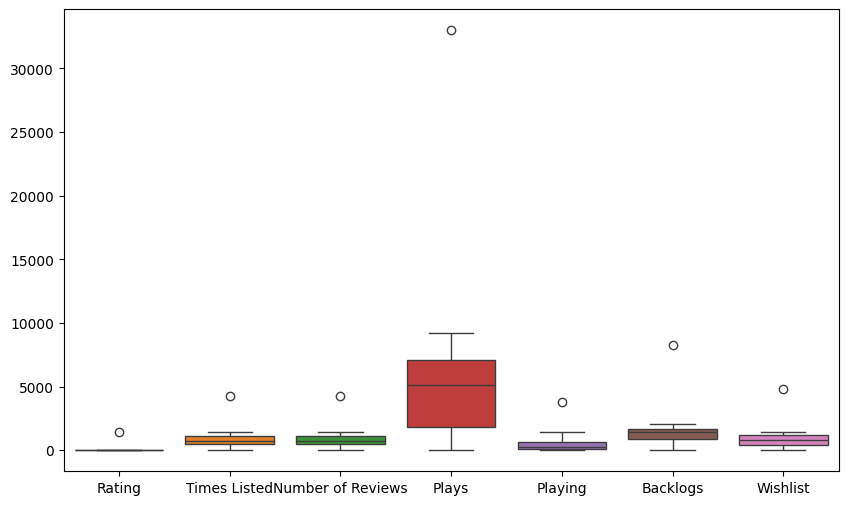

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=boxplots, ax=ax)

In [20]:
#the dataframe seems to have possible outliers and the different numeric columns are all on very different scales
# so I first check the plays column for games past the upper whisker
lots_of_plays = games[games['Plays'] > 15000]
lots_of_plays.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300


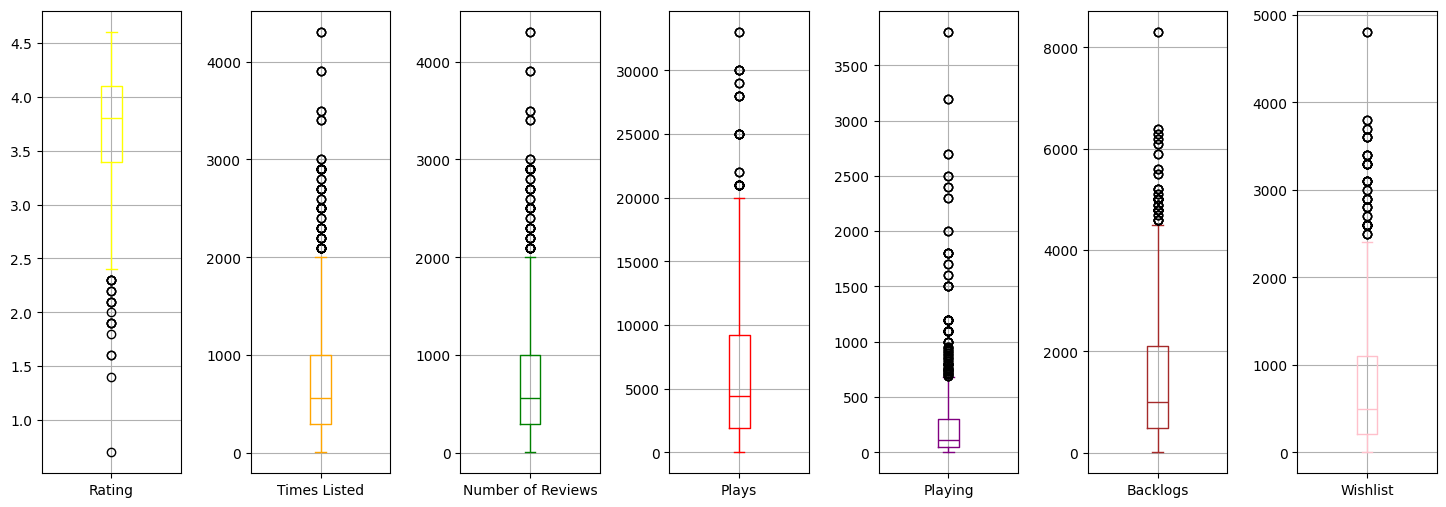

In [51]:
# subplots in one row instead of one plot with different boxplots
fig, ax = plt.subplots(1, 7, figsize=(18, 6))

# draw boxplots - for one column in each subplot
games.boxplot('Rating', ax=ax[0], color='yellow')
games.boxplot('Times Listed', ax=ax[1], color='orange')
games.boxplot('Number of Reviews', ax=ax[2], color='green')
games.boxplot('Plays', ax=ax[3], color='red')
games.boxplot('Playing', ax=ax[4], color='purple')
games.boxplot('Backlogs', ax=ax[5], color='brown')
games.boxplot('Wishlist', ax=ax[6], color='pink')

plt.subplots_adjust(wspace=0.5) 

plt.show()

In [22]:
#the further examinations show that those datapoints probably aren't any outliers, but rather very popular games that differ from the majority of the games in the data set
#that's probably why (except for rating) the median points for all the other numeric columns are on the lower end of each plot, yet there are many datapoints outside the upper whisker
#(those are the fewer games that are the most popular)

In [23]:
#now let's look at games per year
# extracting the year from the 'Release Date' column and convert it to an integer
year = games['Release Date'].dt.year.astype('Int64')

#i'm gonna create a new dataFrame with the year and the count of games for each year
games_by_year = year.value_counts().reset_index()
games_by_year.columns = ['Year', 'Number_of_Games']
games_by_year = games_by_year.sort_values(by='Year')
print(games_by_year)

    Year  Number_of_Games
37  1980                1
39  1982                1
38  1985                1
35  1986                4
36  1987                3
34  1988                5
33  1989                5
32  1990                6
30  1991               11
31  1992                6
28  1993               12
29  1994               11
27  1995               12
25  1996               15
23  1997               18
24  1998               16
21  1999               25
26  2000               15
19  2001               30
22  2002               22
20  2003               26
17  2004               37
15  2005               41
18  2006               32
13  2007               50
14  2008               44
16  2009               40
11  2010               58
12  2011               50
9   2012               60
8   2013               68
10  2014               59
6   2015               73
4   2016               75
7   2017               70
3   2018               77
2   2019               87
5   2020    

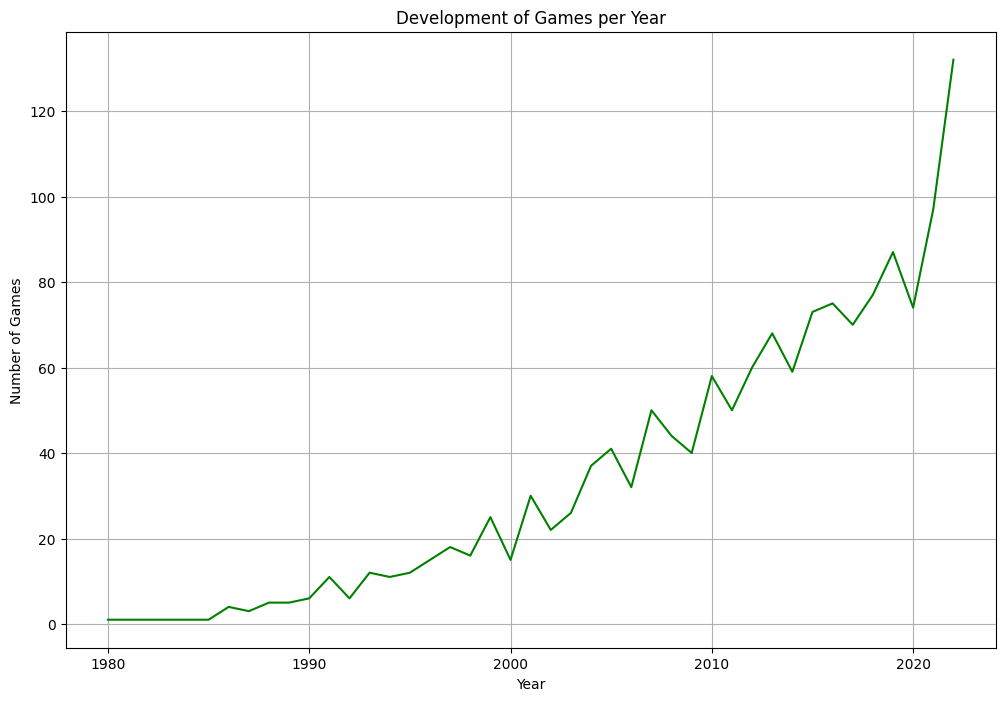

In [24]:
#now i'm plotting it as a line graph to show the development over the years
plt.figure(figsize=(12, 8))

sns.lineplot(x='Year', y='Number_of_Games', data=games_by_year, color='Green')

plt.title('Development of Games per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

In [25]:
#what does this plot tell us about the count of games?
# more games over the years, but there seems to be a bias in the data, because the website hasn't existed for that long

In [26]:
#how would you filter the dataframe for different genres? Test with RPG Games
#i wanna look at all of the games that are RPGs so how do I call them from the Genre column and extract the relevant data to a new dataframe?
rpg_games = games[games['Genres'].apply(lambda genres: 'RPG' in genres)]
rpg_games.head()


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
6,Omori,2020-12-25,"['OMOCAT', 'PLAYISM']",4.2,1600,1600,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A turn-based surreal horror RPG in which a chi...,"[""The best game I've played in my life"", ""omor...",7200,1100,4500,3800


<h4> Genres in the Data

In [27]:
#what are the most popular genres in the dataset?
#we clean the column and then split it at the comma
all_genres = [genre.strip("[]'") for genres_string in games['Genres'].apply(lambda x: x if pd.isna(x) else x.replace("'", "")) for genre in genres_string.split(',')]

#making a new datafrae with the count of each genre
genres_counts = pd.Series(all_genres).value_counts().reset_index()
genres_counts.columns = ['Genre', 'Number_of_Games_in_Genre']

# Display the resulting DataFrame
print(genres_counts.head(10))

                  Genre  Number_of_Games_in_Genre
0             Adventure                       980
1                   RPG                       408
2              Platform                       275
3               Shooter                       263
4                 Indie                       227
5                Puzzle                       161
6              Strategy                       137
7               Brawler                       115
8             Simulator                       109
9   Turn Based Strategy                        96


C:\Users\matte\AppData\Local\Temp\ipykernel_8864\2217751367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number_of_Games_in_Genre', y='Genre', data=genres_counts, legend=False, palette='muted')


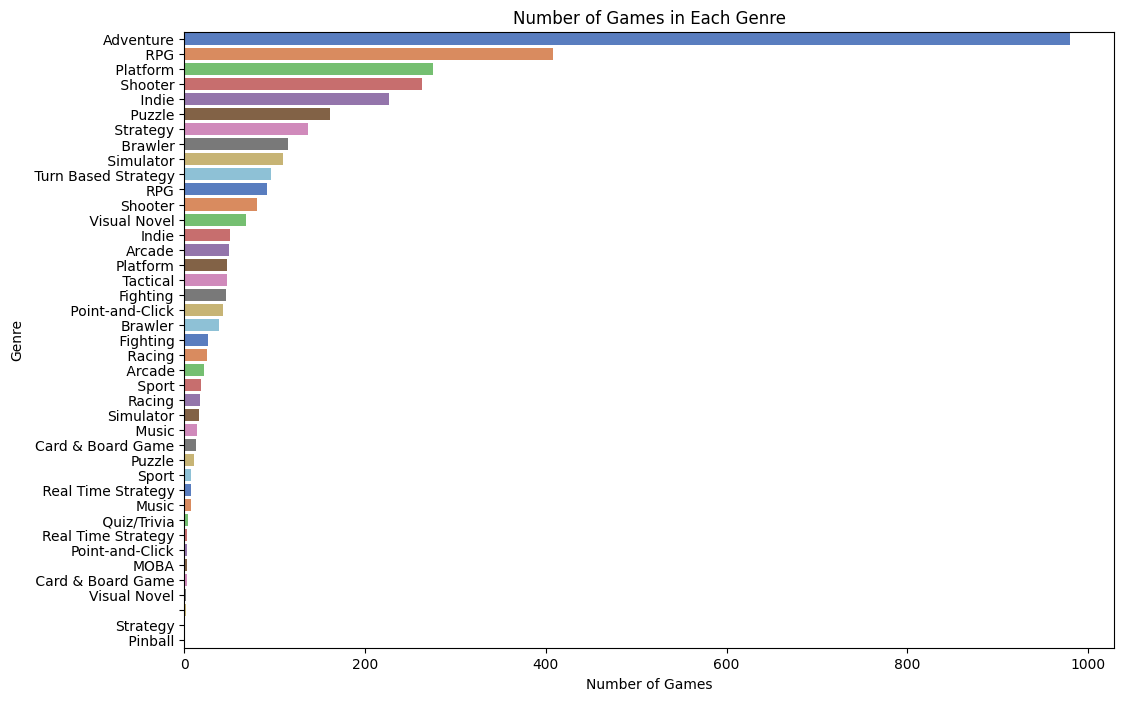

In [28]:
#visualizing the genres as a barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Number_of_Games_in_Genre', y='Genre', data=genres_counts, legend=False, palette='muted')

plt.title('Number of Games in Each Genre')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

In [29]:
print(genres_counts.describe())
sum_genres = genres_counts['Number_of_Games_in_Genre'].sum()
print('the countsum of genres in the dataset is', sum_genres)


       Number_of_Games_in_Genre
count                 41.000000
mean                  86.292683
std                  168.421977
min                    1.000000
25%                    7.000000
50%                   26.000000
75%                   91.000000
max                  980.000000
the countsum of genres in the dataset is 3538


<h4> What about the Teams that make the games?

In [30]:
# extracting individual teams
games['Team'] = games['Team'].astype(str)
games['Team'] = games['Team'].apply(lambda x: eval(x) if not pd.isna(x) else [])
all_teams = [team.strip() for teams_list in games['Team'] for team in teams_list]

# creating a DataFrame with the teams and their counts
team_counts = pd.Series(all_teams).value_counts().reset_index()
team_counts.columns = ['Team', 'Number_of_Games_by_Team']
team_counts.head()

,Team,Number_of_Games_by_Team
0,Nintendo,240
1,Capcom,89
2,Square Enix,75
3,Sega,62
4,Electronic Arts,54


In [31]:
print(team_counts.describe())
sum_teams = team_counts['Team'].count()
print('the number of teams in the dataset is', sum_teams)

       Number_of_Games_by_Team
count               649.000000
mean                  4.070878
std                  11.939194
min                   1.000000
25%                   1.000000
50%                   2.000000
75%                   3.000000
max                 240.000000
the number of teams in the dataset is 649


In [32]:
#then i filtered the dataframe to minimize it a bit in order to plot it
filtered_team_counts = team_counts[team_counts['Number_of_Games_by_Team'] > 5]

# Display the resulting DataFrame
print(filtered_team_counts.head())
print('The number of Teams with more than 5 games is', filtered_team_counts['Team'].count())

              Team  Number_of_Games_by_Team
0         Nintendo                      240
1           Capcom                       89
2      Square Enix                       75
3             Sega                       62
4  Electronic Arts                       54
The number of Teams with more than 5 games is 84


C:\Users\matte\AppData\Local\Temp\ipykernel_8864\3262507877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number_of_Games_by_Team', y='Team', data=filtered_team_counts, legend=False, palette="muted")


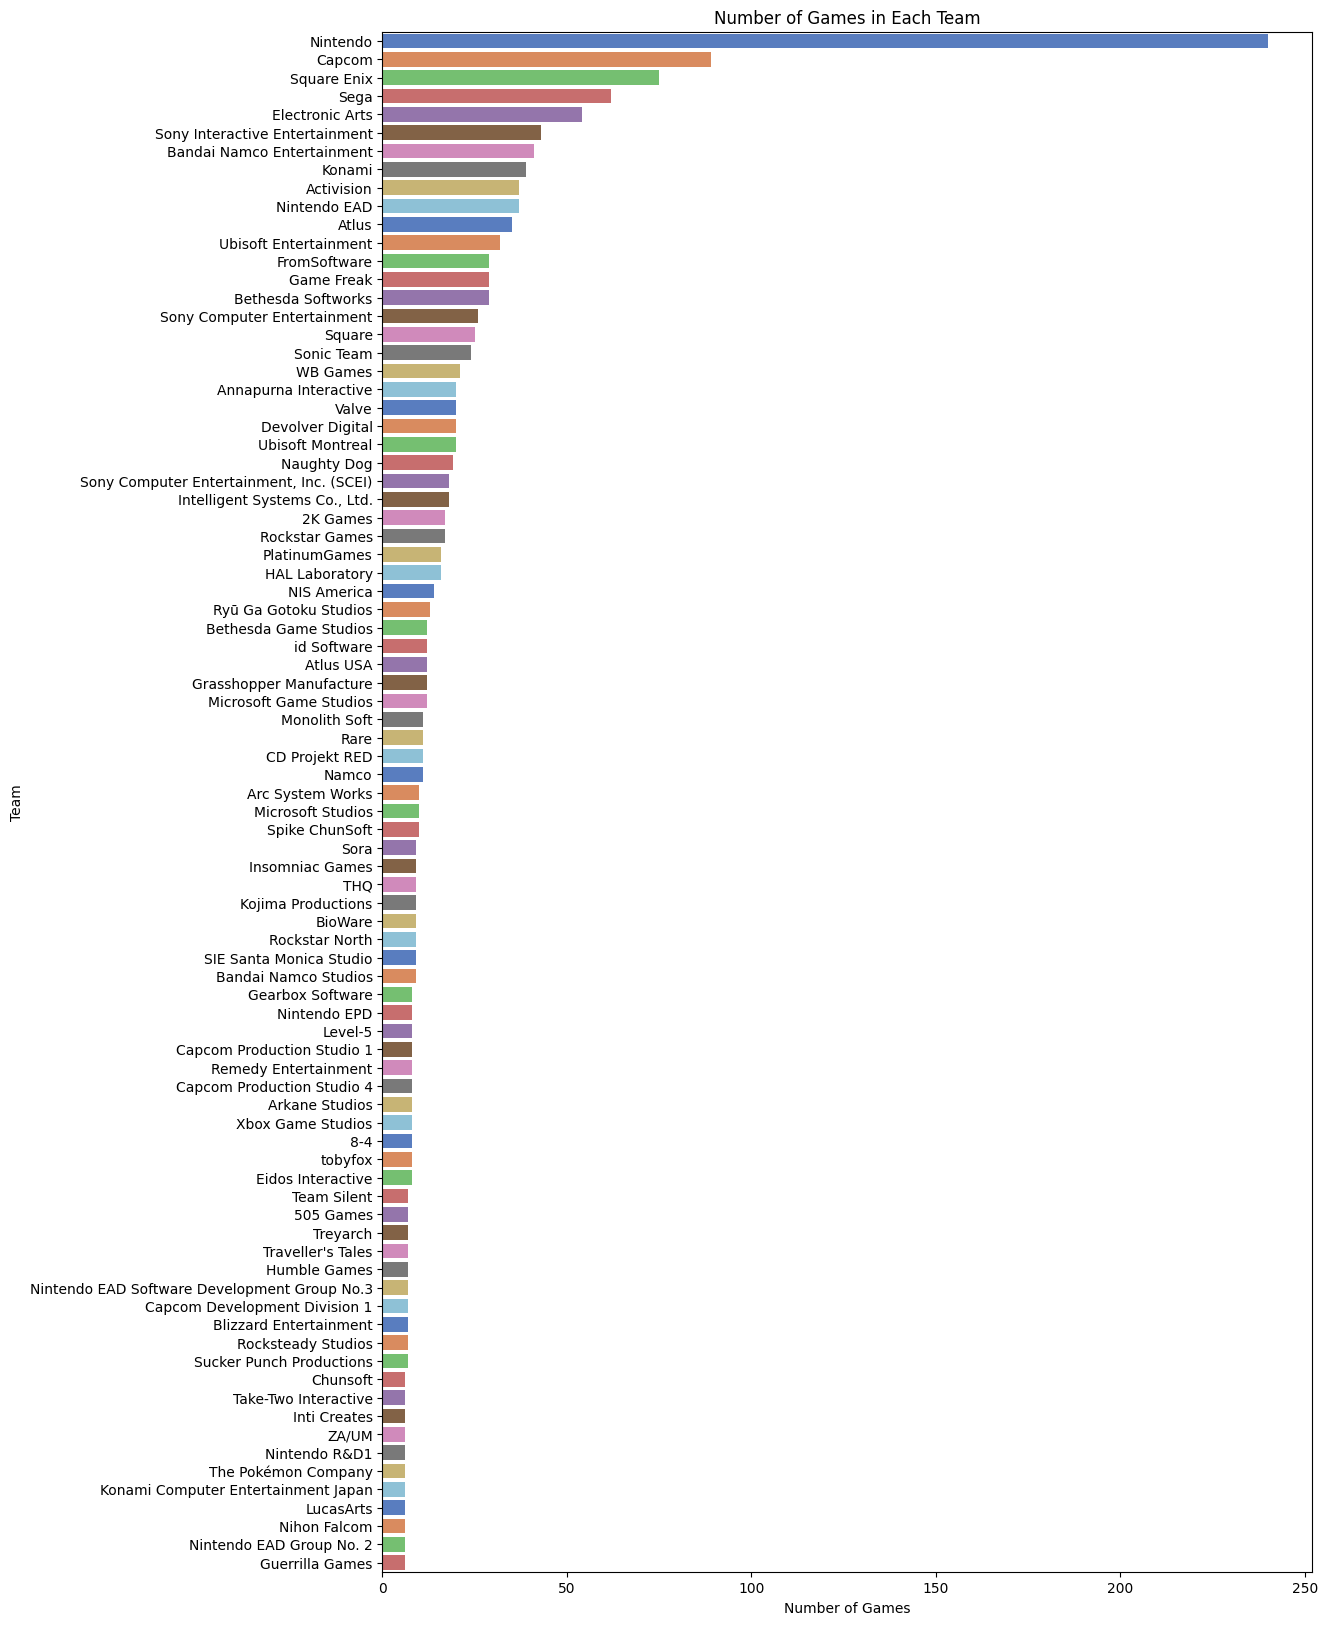

In [33]:
# teams plot
plt.figure(figsize=(12, 20))
sns.barplot(x='Number_of_Games_by_Team', y='Team', data=filtered_team_counts, legend=False, palette="muted")

plt.title('Number of Games in Each Team')
plt.xlabel('Number of Games')
plt.ylabel('Team')
plt.show()

In [34]:
#many companies that belong  together --> extra table for that? how do I group them together?
#number of videogames per country
#get a table with all the Teams/companies and their countries
#webscraping the seats of the companies, city/country
#to maybe make a map with geopandas?

In [35]:
url1 = "https://en.wikipedia.org/wiki/List_of_video_game_developers"
url2 = "https://en.wikipedia.org/wiki/List_of_video_game_publishers"
url3 = "https://en.wikipedia.org/wiki/List_of_indie_game_developers"
list_df_tables = pd.read_html(url1)
list_df_tables_2 = pd.read_html(url2)
list_df_tables_3 = pd.read_html(url3)
print(list_df_tables)

[    0                                                  1
0 NaN  This article needs to be updated. Please help ...,                                                    0
0                            Part of a series on the
1                                Video game industry
2  Development Producer Developer Designer Artist...
3  Products Video game Specialized / alternative-...
4  Publishing Markets China U.S. Japan South Kore...
5  Distribution and monetization Buy-to-play AAA ...
6               Related Game studies Game journalism
7  Lists List of video game developers Indie List...
8  .mw-parser-output .navbar{display:inline;font-...,     0                                                  1
0 NaN  This list related to video games is incomplete...,                               0
0          Active independently
1          Active as subsidiary
2  Defunct and no longer active,               Developer           City Administrative division   
0              0verflow          Tokyo     

In [36]:
data_developers = list_df_tables[4]
data_developers = data_developers.drop(columns=['Administrative division', 'Est.', 'Notable games, series or franchises', 'Notes'])
data_developers.head()

,Developer,City,Country
0,0verflow,Tokyo,Japan
1,11 bit studios,Warsaw,Poland
2,1C Company,Moscow,Russia
3,1-Up Studio,Tokyo,Japan
4,2K Czech,Brno,Czech Republic


In [37]:
data_publishers = list_df_tables_2[1]
data_publishers = data_publishers.drop(columns=['Est.', 'Notable games published', 'Notes'])
data_publishers.head()

,Publisher,Location
0,07th Expansion,Japan
1,11 bit studios,"Warsaw, Poland"
2,1C Company,"Moscow, Russia"
3,20th Century Games,"Century City, California, United States"
4,2K Games,"Novato, California, United States"


In [38]:
data_publishers['Location'] = data_publishers['Location'].astype(str)
data_publishers['City'] = ''
data_publishers['Country'] = ''

# Loop through each row
for index, row in data_publishers.iterrows():
    names = row['Location'].split(', ')

    if len(names) == 1:
        data_publishers.at[index, 'Country'] = names[0]
    elif len(names) > 1:
        data_publishers.at[index, 'City'] = names[0]
        data_publishers.at[index, 'Country'] = names[-1]

data_publishers = data_publishers.drop(columns=['Location'])
data_publishers = data_publishers.rename(columns={'Publisher': 'Developer'})
data_publishers.head()

,Developer,City,Country
0,07th Expansion,,Japan
1,11 bit studios,Warsaw,Poland
2,1C Company,Moscow,Russia
3,20th Century Games,Century City,United States
4,2K Games,Novato,United States


In [39]:
data_indie = list_df_tables_3[2]
data_indie = data_indie.drop(columns=['Autonomous area', 'Notable games', 'Notes'])
data_indie.head()

,Developer,City,Country
0,17-Bit,Kyoto,Japan
1,ACE Team,Santiago,Chile
2,Akupara Games,Los Angeles,United States
3,Alec Holowka,Winnipeg,Canada
4,Alientrap,Saskatoon,Canada


In [40]:
team_counts.head()

,Team,Number_of_Games_by_Team
0,Nintendo,240
1,Capcom,89
2,Square Enix,75
3,Sega,62
4,Electronic Arts,54


In [41]:
data_all_developers = pd.concat([data_developers, data_indie, data_publishers], ignore_index=True)
data_all_developers.head()

,Developer,City,Country
0,0verflow,Tokyo,Japan
1,11 bit studios,Warsaw,Poland
2,1C Company,Moscow,Russia
3,1-Up Studio,Tokyo,Japan
4,2K Czech,Brno,Czech Republic


In [42]:
# Merge the two DataFrames on 'Developer' and 'Team'
teams_with_location = pd.merge(team_counts, data_all_developers, left_on='Team', right_on='Developer', how='left')
teams_with_location = teams_with_location.drop(columns=['Developer'])
teams_with_location = teams_with_location.drop_duplicates(subset='Team', keep='first')
teams_with_location.head()

,Team,Number_of_Games_by_Team,City,Country
0,Nintendo,240,Kyoto,Japan
2,Capcom,89,Osaka,Japan
4,Square Enix,75,"Shinjuku, Tokyo",Japan
6,Sega,62,Tokyo,Japan
8,Electronic Arts,54,Redwood City,United States


In [43]:
#cleaning the dataframe and only looking at the companies which locations we know
teams_with_location = teams_with_location.dropna(subset=['Country'])
teams_with_location.at[356, 'Country'] = 'Ukraine'

In [44]:
teams_with_location.loc[teams_with_location['Country'] == 'United Kingdoms', 'Country'] = 'United Kingdom'


           Country  Team_Counts
21   United States           96
11           Japan           61
20  United Kingdom           23
3           Canada           16
18          Sweden           13
8           France            8
14          Poland            4
7          Finland            4
9          Germany            3
0        Australia            3
19         Ukraine            2
10           Italy            1
1          Austria            1
12     Netherlands            1
13     New Zealand            1
6          Denmark            1
15          Russia            1
16       Singapore            1
17     South Korea            1
5   Czech Republic            1
4            China            1
2          Belgium            1
22             nan            1


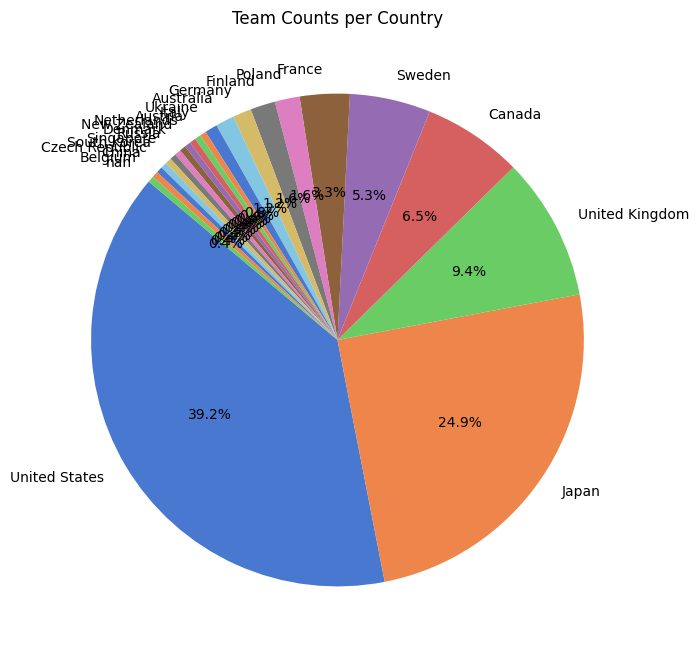

In [45]:
#how many teams are there per country?
teams_per_country = teams_with_location.groupby('Country')['Team'].count().reset_index()

#we sort them from most to least most
teams_per_country.columns = ['Country', 'Team_Counts']
teams_per_country = teams_per_country.sort_values(by='Team_Counts', ascending=False)
print(teams_per_country)

plt.figure(figsize=(8, 8))
plt.pie(teams_per_country['Team_Counts'], labels=teams_per_country['Country'], autopct='%1.1f%%', startangle=140,  colors=sns.color_palette('muted'))
plt.title('Team Counts per Country')


plt.show()

In [46]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Sample GeoDataFrame with country geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head()


C:\Users\matte\AppData\Local\Temp\ipykernel_8864\1416874865.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


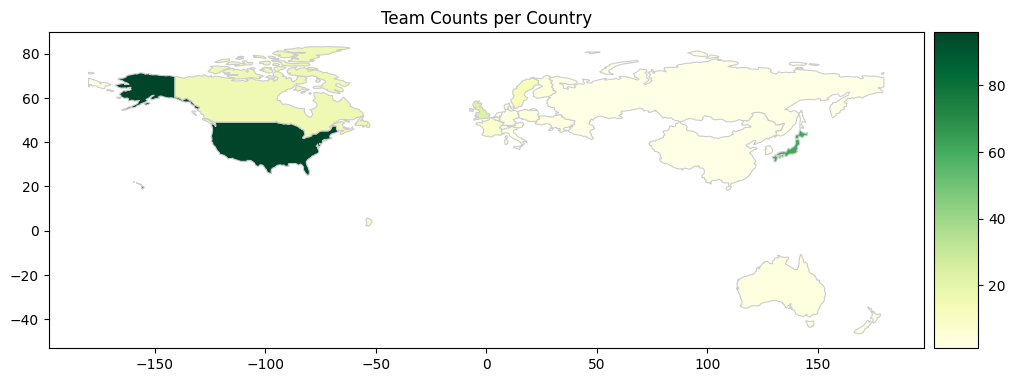

In [53]:
#renaming USA
teams_per_country.at[21, 'Country'] = 'United States of America'

# Merge the GeoDataFrame with team counts
world_team_counts = world.merge(teams_per_country, how='left', left_on='name', right_on='Country')

# Plot the world map with team counts
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world_team_counts.plot(column='Team_Counts', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.set_title('Team Counts per Country')

plt.show()


In [48]:
games_per_country = teams_with_location.groupby('Country')['Number_of_Games_by_Team'].sum().reset_index()
games_per_country.columns = ['Country', 'Game_Counts']
games_per_country

,Country,Game_Counts
0,Australia,3
1,Austria,4
2,Belgium,1
3,Canada,38
4,China,3
5,Czech Republic,1
6,Denmark,4
7,Finland,12
8,France,26
9,Germany,7


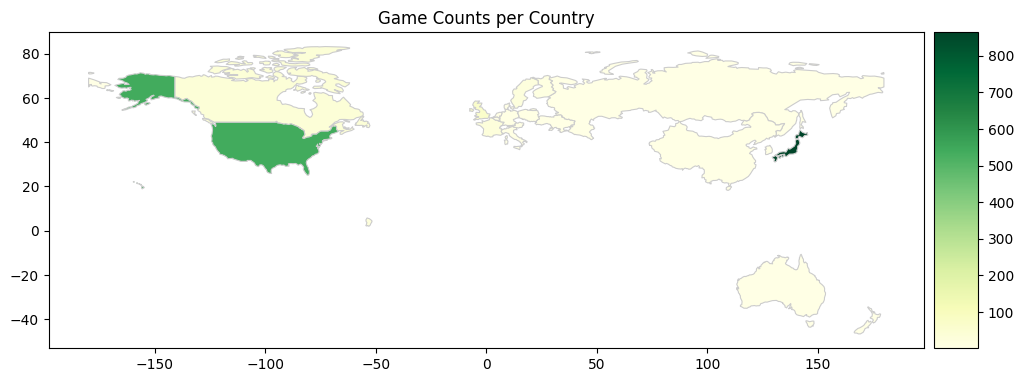

In [49]:
#renaming USA
games_per_country.at[21, 'Country'] = 'United States of America'

# Merge the GeoDataFrame with team counts
world_team_counts = world.merge(games_per_country, how='left', left_on='name', right_on='Country')

# Plot the world map with team counts
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world_team_counts.plot(column='Game_Counts', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.set_title('Game Counts per Country')

plt.show()

In [50]:
from geopy.geocoders import Nominatim


# Create a GeoDataFrame with developer cities
geolocator = Nominatim(user_agent="developer_mapping")
teams_with_location['location'] = teams_with_location['City'].apply(lambda x: geolocator.geocode(x) if geolocator.geocode(x) else None)
teams_with_location['geometry'] = teams_with_location['location'].apply(lambda loc: gpd.points_from_xy([loc.longitude], [loc.latitude]) if loc else None)



gdf_developers = gpd.GeoDataFrame(teams_with_location, geometry='geometry')


# Plot the world map
ax = world.plot(figsize=(15, 10), color='lightgrey')

# Plot developer cities as points on the map
gdf_developers.plot(ax=ax, color='red', markersize=50, marker='o', label='Developer Cities')

# Add labels to each point
for x, y, label in zip(gdf_developers.geometry.x, gdf_developers.geometry.y, gdf_developers['Developer']):
    ax.text(x, y, label, fontsize=8)

plt.title('Developer Cities on World Map')
plt.show()


KeyboardInterrupt: 

<h4> Indie vs. Publisher Games

In [54]:
#one idea for the final would be to look at indie games compared to big publisher games
indie_games = games[games['Genres'].apply(lambda genres: 'Indie' in genres)]
print(indie_games.head())
publisher_games = games[games['Genres'].apply(lambda genres: 'Indie' not in genres)]
print(publisher_games.head())

           Title Release Date                Team  Rating  Times Listed   
1          Hades   2019-12-10  [Supergiant Games]     4.3          2900  \
3      Undertale   2015-09-15      [tobyfox, 8-4]     4.2          3500   
4  Hollow Knight   2017-02-24       [Team Cherry]     4.4          3000   
6          Omori   2020-12-25   [OMOCAT, PLAYISM]     4.2          1600   
8       Among Us   2018-06-15        [InnerSloth]     3.0           867   

   Number of Reviews                                             Genres   
1               2900           ['Adventure', 'Brawler', 'Indie', 'RPG']  \
3               3500  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4               3000                 ['Adventure', 'Indie', 'Platform']   
6               1600  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
8                867                              ['Indie', 'Strategy']   

                                             Summary   
1  A rogue-lite hack and slash dungeon cra

In [55]:
# games per team
# average rating for indie and publisher

In [56]:
indie_games.describe()

,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,278,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,2017-09-21 10:42:18.129496320,3.718345,667.226619,667.226619,5569.158273,303.615108,1504.122302,873.780576
min,2001-12-20 00:00:00,2.000000,48.000000,48.000000,61.000000,2.000000,40.000000,12.000000
25%,2015-07-23 00:00:00,3.500000,238.750000,238.750000,1600.000000,51.500000,491.250000,242.000000
50%,2018-06-15 00:00:00,3.800000,491.500000,491.500000,3700.000000,131.000000,996.000000,562.500000
75%,2021-06-04 12:00:00,4.100000,820.000000,820.000000,7500.000000,326.000000,1900.000000,1200.000000
max,2022-12-15 00:00:00,4.600000,3500.000000,3500.000000,28000.000000,3200.000000,8300.000000,3800.000000
std,NaN,0.478552,650.521281,650.521281,5874.736566,502.045555,1506.396659,878.878551


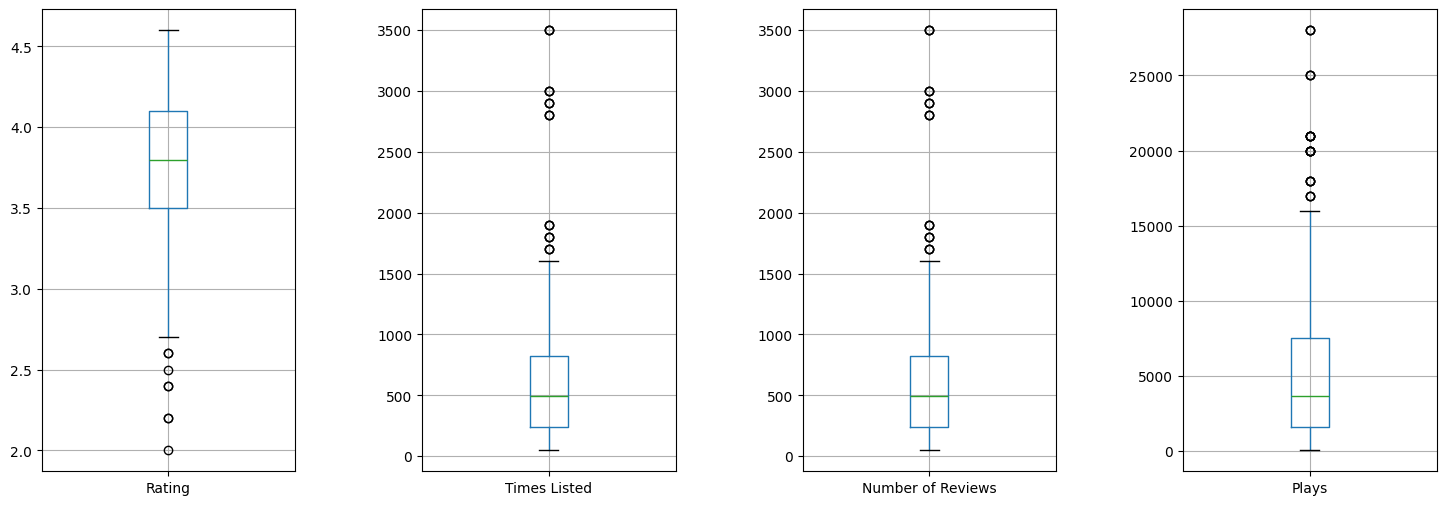

In [57]:
#boxplot for indie games
fig, ax = plt.subplots(1, 4, figsize=(18, 6))

# draw boxplots 
indie_games.boxplot('Rating', ax=ax[0])
indie_games.boxplot('Times Listed', ax=ax[1])
indie_games.boxplot('Number of Reviews', ax=ax[2])
indie_games.boxplot('Plays', ax=ax[3])

plt.subplots_adjust(wspace=0.5) 

plt.show()

In [58]:
publisher_games.describe()

,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,1191,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,2011-03-09 12:32:02.418136064,3.720991,811.500420,811.500420,6617.348447,261.142737,1476.432410,752.720403
min,1980-05-22 00:00:00,0.700000,8.000000,8.000000,8.000000,0.000000,9.000000,2.000000
25%,2005-10-17 00:00:00,3.400000,315.000000,315.000000,2100.000000,43.500000,481.500000,209.000000
50%,2012-06-23 00:00:00,3.800000,593.000000,593.000000,4700.000000,110.000000,1000.000000,484.000000
75%,2018-05-13 12:00:00,4.100000,1100.000000,1100.000000,9600.000000,295.000000,2200.000000,1000.000000
max,2022-12-13 00:00:00,4.600000,4300.000000,4300.000000,33000.000000,3800.000000,6400.000000,4800.000000
std,NaN,0.533007,697.511843,697.511843,5888.080287,410.534707,1309.021727,772.389829


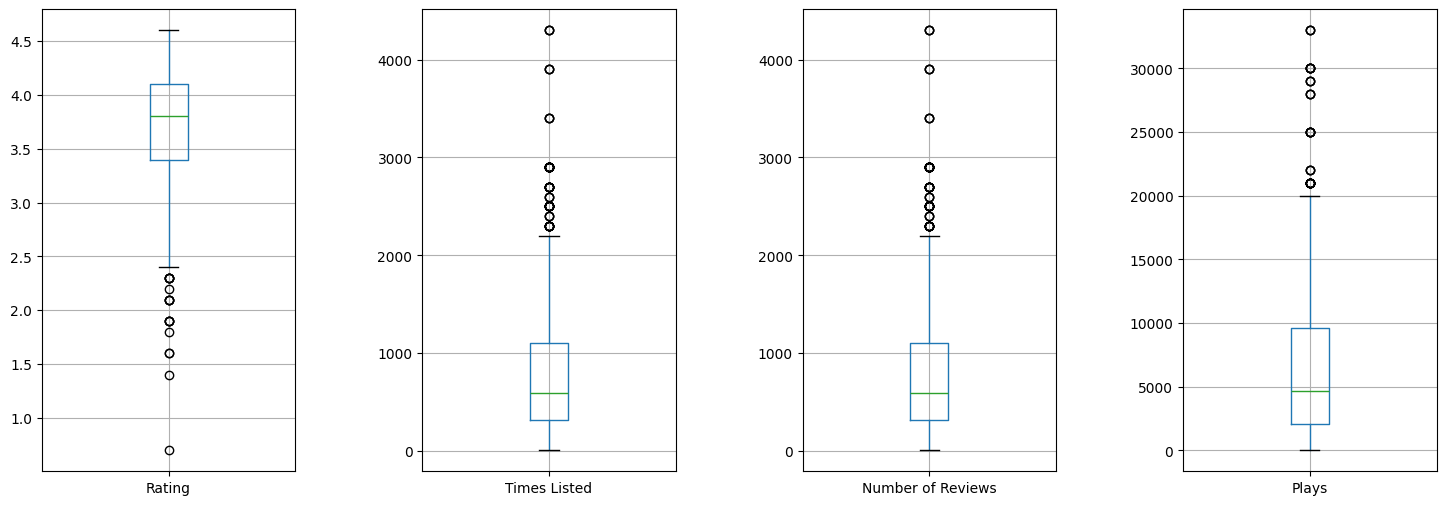

In [59]:
#boxplot for publisher games
fig, ax = plt.subplots(1, 4, figsize=(18, 6))

# draw boxplots 
publisher_games.boxplot('Rating', ax=ax[0])
publisher_games.boxplot('Times Listed', ax=ax[1])
publisher_games.boxplot('Number of Reviews', ax=ax[2])
publisher_games.boxplot('Plays', ax=ax[3])

plt.subplots_adjust(wspace=0.5) 

plt.show()

In [60]:
#relative numbers indie vs. publisher games per year Balkendiagramm

In [83]:
from scipy.stats import ttest_ind

# Assuming df_indie and df_publisher are your dataframes
_, p_value = ttest_ind(indie_games['Rating'], publisher_games['Rating'], equal_var=False)


C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdoc

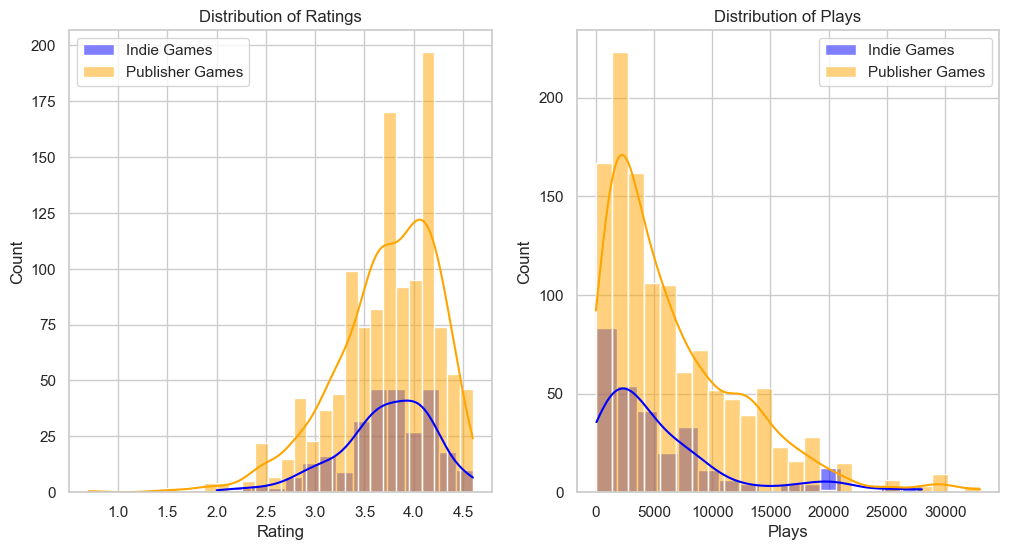

Rating-T: -0.0812
Rating-P-Value: 0.9353
Plays-T: -0.0812
Plays-P-Value: 0.9353


In [85]:
#are there statistical differences between indie and publisher games, tested by the categories rating and plays? (which show popularity most clearly)
from scipy.stats import ttest_ind


# Independent t-test
rating_t_statistic, rating_p_value = ttest_ind(indie_games['Rating'], publisher_games['Rating'], equal_var=False)
plays_t_statistic, plays_p_value = ttest_ind(indie_games['Rating'], publisher_games['Rating'], equal_var=False)

# Visualize the distributions
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting the Rating distribution
plt.subplot(1, 2, 1)
sns.histplot(indie_games['Rating'], color='blue', kde=True, label='Indie Games')
sns.histplot(publisher_games['Rating'], color='orange', kde=True, label='Publisher Games')
plt.title('Distribution of Ratings')
plt.legend()

# Plotting the Plays distribution
plt.subplot(1, 2, 2)
sns.histplot(indie_games['Plays'], color='blue', kde=True, label='Indie Games')
sns.histplot(publisher_games['Plays'], color='orange', kde=True, label='Publisher Games')
plt.title('Distribution of Plays')
plt.legend()

plt.show()

# Print the t-test results
print(f'Rating-T: {rating_t_statistic:.4f}')
print(f'Rating-P-Value: {rating_p_value:.4f}')

print(f'Plays-T: {plays_t_statistic:.4f}')
print(f'Plays-P-Value: {rating_p_value:.4f}')

<h4> NLP with RPG Game Summaries </h4>

In [61]:
import nltk
import string
from collections import Counter
from wordcloud import WordCloud
import gensim

In [62]:
# textual analysis for RPG games summaries
# concaucting the summaries together
rpg_summaries = rpg_games['Summary'].sum()
rpg_summaries
list_summaries = rpg_summaries.split()
print(list_summaries[0:30])

['Elden', 'Ring', 'is', 'a', 'fantasy,', 'action', 'and', 'open', 'world', 'game', 'with', 'RPG', 'elements', 'such', 'as', 'stats,', 'weapons', 'and', 'spells.', 'Rise,', 'Tarnished,', 'and', 'be', 'guided', 'by', 'grace', 'to', 'brandish', 'the', 'power']


In [63]:
#to lower, cleaning text and removing stopwords
list_summaries = [l.strip().lower() for l in list_summaries]
stop_en = nltk.corpus.stopwords.words('english')
list_summaries = [l for l in list_summaries if l not in stop_en]
list_summaries = [l.strip(string.punctuation + string.digits) for l in list_summaries if l.strip(string.punctuation + string.digits)]
list_summaries

['elden',
 'ring',
 'fantasy',
 'action',
 'open',
 'world',
 'game',
 'rpg',
 'elements',
 'stats',
 'weapons',
 'spells',
 'rise',
 'tarnished',
 'guided',
 'grace',
 'brandish',
 'power',
 'elden',
 'ring',
 'become',
 'elden',
 'lord',
 'lands',
 'between.a',
 'rogue-lite',
 'hack',
 'slash',
 'dungeon',
 'crawler',
 'zagreus',
 'son',
 'hades',
 'greek',
 'god',
 'dead',
 'attempts',
 'escape',
 'home',
 'oppressive',
 'father',
 'fighting',
 'souls',
 'dead',
 'various',
 'layers',
 'ever-shifting',
 'underworld',
 'getting',
 'know',
 'forging',
 'relationships',
 'inhabitants.the',
 'legend',
 'zelda',
 'breath',
 'wild',
 'first',
 'd',
 'open-world',
 'game',
 'zelda',
 'series',
 'link',
 'travel',
 'anywhere',
 'equipped',
 'weapons',
 'armor',
 'found',
 'throughout',
 'world',
 'grant',
 'various',
 'bonuses',
 'unlike',
 'many',
 'games',
 'series',
 'breath',
 'wild',
 'impose',
 'specific',
 'order',
 'quests',
 'dungeons',
 'must',
 'completed',
 'game',
 'still',
 'e

In [64]:
freq_summaries = Counter(list_summaries)
freq_summaries.most_common(40)

[('game', 359),
 ('new', 280),
 ('world', 232),
 ('pokémon', 145),
 ('series', 137),
 ('story', 114),
 ('games', 110),
 ('player', 97),
 ('fantasy', 89),
 ('rpg', 89),
 ('adventure', 87),
 ('time', 86),
 ('players', 86),
 ('first', 84),
 ('characters', 84),
 ('gameplay', 83),
 ('set', 81),
 ('action', 78),
 ('system', 76),
 ('one', 75),
 ('final', 75),
 ('version', 71),
 ('explore', 69),
 ('battle', 68),
 ('experience', 67),
 ('features', 67),
 ('two', 66),
 ('unique', 63),
 ('combat', 61),
 ('released', 59),
 ('weapons', 57),
 ('take', 57),
 ('elements', 56),
 ('many', 56),
 ('must', 52),
 ('fight', 52),
 ('character', 51),
 ('role-playing', 51),
 ('dark', 51),
 ('emblem', 50)]

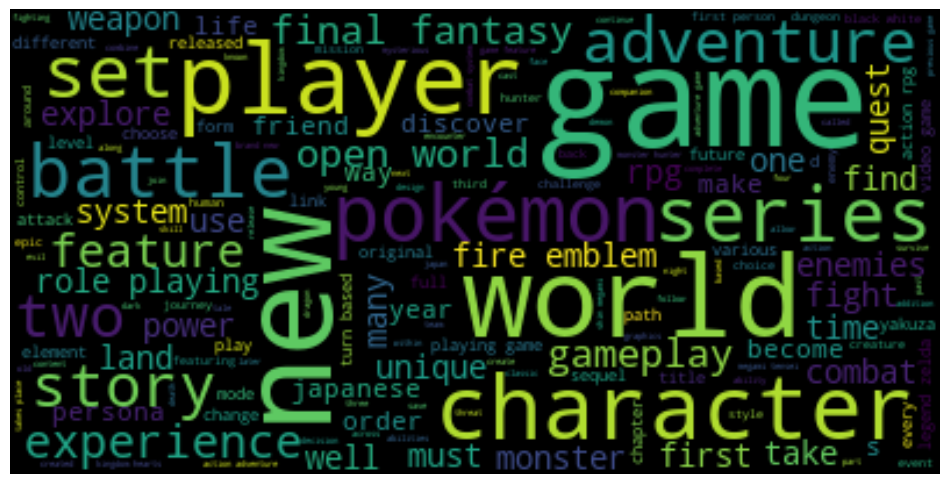

In [65]:
cleaned = ' '.join(list_summaries)
wordcloud = WordCloud().generate(cleaned)
wordcloud = WordCloud(max_font_size=60).generate(cleaned)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

C:\Users\matte\AppData\Local\Temp\ipykernel_8864\501426183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette='viridis')  # You can change 'viridis' to another color palette
C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs 

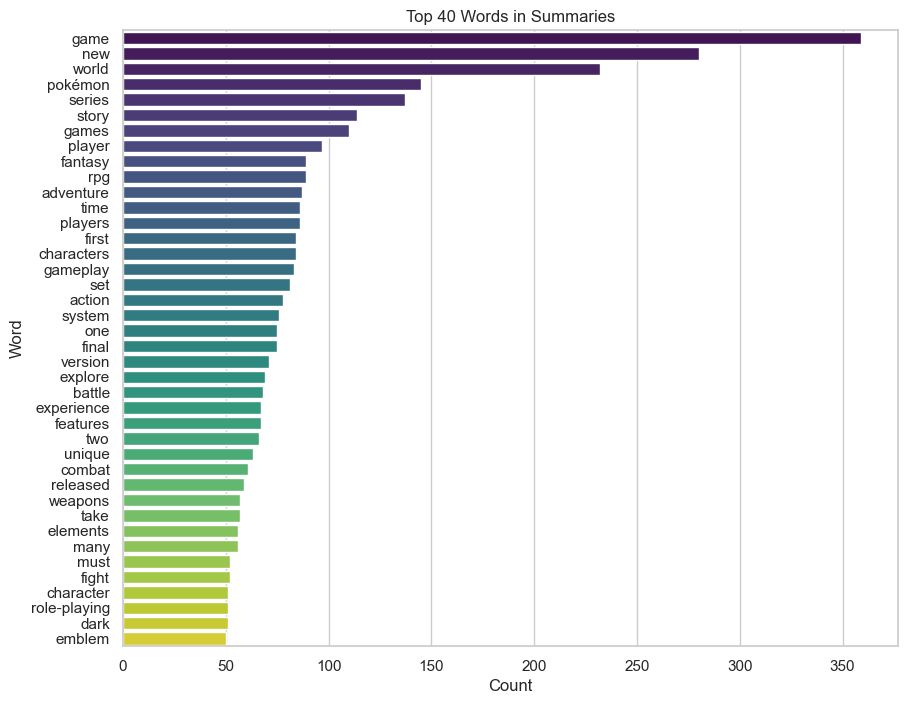

In [89]:
most = freq_summaries.most_common()

x, y = [], []
for word,count in most[:40]:
    if (word not in stop_en):
        x.append(word)
        y.append(count)
        

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create a bar plot
sns.barplot(x=y, y=x, palette='viridis')  # You can change 'viridis' to another color palette

# Customize the plot
plt.title('Top 40 Words in Summaries')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [67]:
#testing ngrams
from nltk.util import ngrams
list(ngrams(list_summaries,2))

[('elden', 'ring'),
 ('ring', 'fantasy'),
 ('fantasy', 'action'),
 ('action', 'open'),
 ('open', 'world'),
 ('world', 'game'),
 ('game', 'rpg'),
 ('rpg', 'elements'),
 ('elements', 'stats'),
 ('stats', 'weapons'),
 ('weapons', 'spells'),
 ('spells', 'rise'),
 ('rise', 'tarnished'),
 ('tarnished', 'guided'),
 ('guided', 'grace'),
 ('grace', 'brandish'),
 ('brandish', 'power'),
 ('power', 'elden'),
 ('elden', 'ring'),
 ('ring', 'become'),
 ('become', 'elden'),
 ('elden', 'lord'),
 ('lord', 'lands'),
 ('lands', 'between.a'),
 ('between.a', 'rogue-lite'),
 ('rogue-lite', 'hack'),
 ('hack', 'slash'),
 ('slash', 'dungeon'),
 ('dungeon', 'crawler'),
 ('crawler', 'zagreus'),
 ('zagreus', 'son'),
 ('son', 'hades'),
 ('hades', 'greek'),
 ('greek', 'god'),
 ('god', 'dead'),
 ('dead', 'attempts'),
 ('attempts', 'escape'),
 ('escape', 'home'),
 ('home', 'oppressive'),
 ('oppressive', 'father'),
 ('father', 'fighting'),
 ('fighting', 'souls'),
 ('souls', 'dead'),
 ('dead', 'various'),
 ('various', '

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

C:\Users\matte\AppData\Local\Temp\ipykernel_8864\2273306575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y,y=x, palette='viridis')
C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  commo

<Axes: >

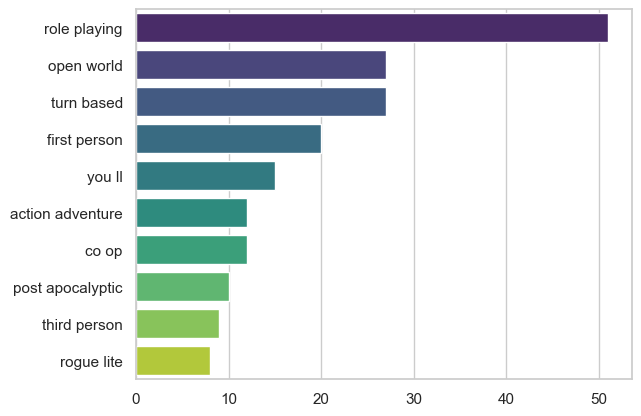

In [91]:
top_n_bigrams=get_top_ngram(list_summaries,2)[:10]
x,y = map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x, palette='viridis')

<Axes: >

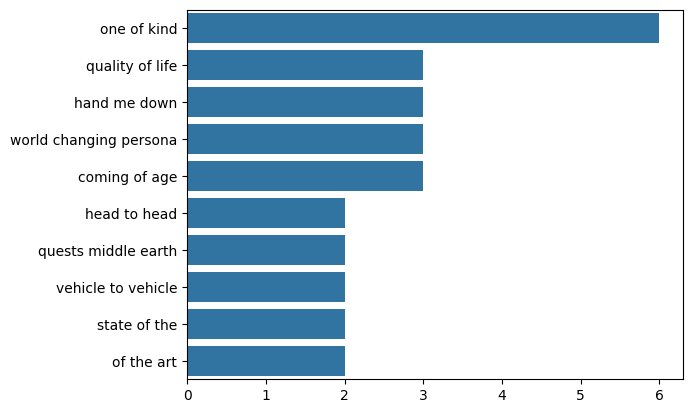

In [70]:
top_tri_grams=get_top_ngram(list_summaries,n=3)
x,y = map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<Axes: >

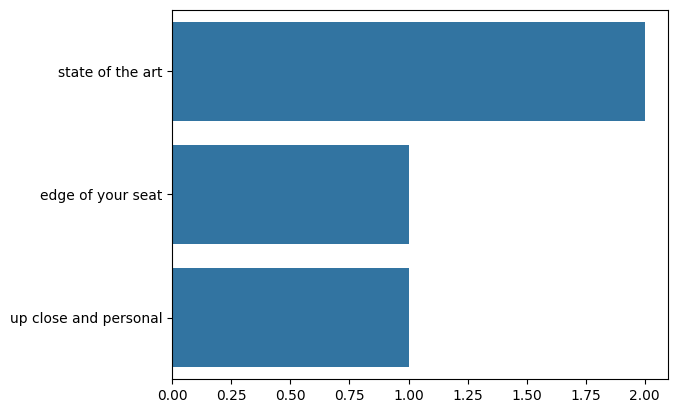

In [71]:
top_quadro_grams=get_top_ngram(list_summaries,n=4)
x,y = map(list,zip(*top_quadro_grams))
sns.barplot(x=y,y=x)

In [72]:
# topic modelling exploration
def preprocess_news(df):
    corpus = []
    stem = nltk.stem.PorterStemmer()
    lem = nltk.stem.WordNetLemmatizer()
    for news in df['Summary']:
        words=[w for w in nltk.tokenize.word_tokenize(news) if (w not in stop_en)]
        words= [w.strip().lower() for w in words]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

corpus = preprocess_news(rpg_games)
corpus

[['elden',
  'ring',
  'fantasy',
  'action',
  'open',
  'world',
  'game',
  'rpg',
  'element',
  'stats',
  'weapon',
  'spell',
  'rise',
  'tarnished',
  'guided',
  'grace',
  'brandish',
  'power',
  'elden',
  'ring',
  'become',
  'elden',
  'lord',
  'land',
  'between'],
 ['rogue-lite',
  'hack',
  'slash',
  'dungeon',
  'crawler',
  'zagreus',
  'son',
  'hades',
  'greek',
  'god',
  'dead',
  'attempt',
  'escape',
  'home',
  'oppressive',
  'father',
  'fighting',
  'soul',
  'dead',
  'various',
  'layer',
  'ever-shifting',
  'underworld',
  'getting',
  'know',
  'forging',
  'relationship',
  'inhabitant'],
 ['the',
  'legend',
  'zelda',
  'breath',
  'wild',
  'first',
  'open-world',
  'game',
  'zelda',
  'series',
  'link',
  'travel',
  'anywhere',
  'equipped',
  'weapon',
  'armor',
  'found',
  'throughout',
  'world',
  'grant',
  'various',
  'bonus',
  'unlike',
  'many',
  'game',
  'series',
  'breath',
  'wild',
  'impose',
  'specific',
  'order',


<Axes: >

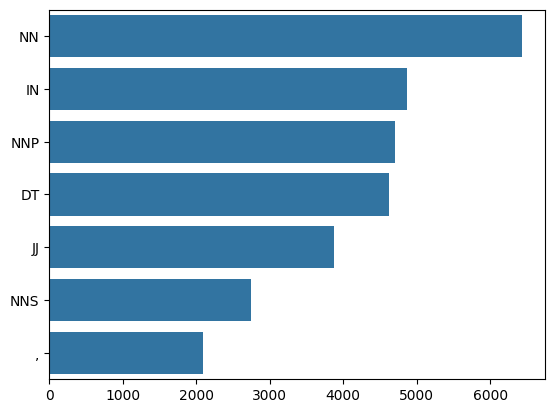

In [73]:
#pos EA summaries of rpg games
def pos(text):
    pos = nltk.pos_tag(nltk.tokenize.word_tokenize(text))
    pos = list(map(list,zip(*pos)))[1]
    return pos

tags = rpg_games['Summary'].apply(lambda x : pos(x))
tags = [x for l in tags for x in l]
counter = Counter(tags)

x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

<Axes: >

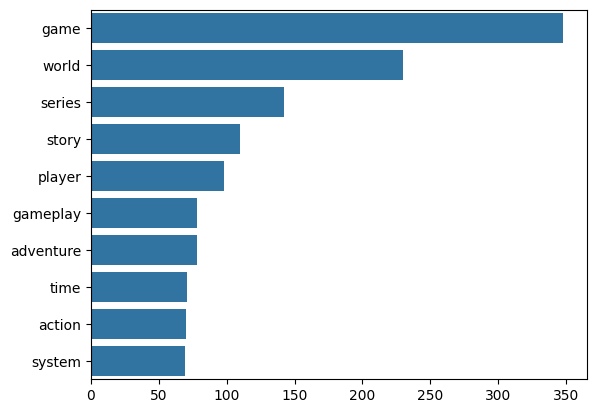

In [74]:
def get_adjs(text):
    adj = []
    pos = nltk.pos_tag(nltk.tokenize.word_tokenize(text))
    for word,tag in pos:
        if tag == 'NN':
            adj.append(word)
    return adj


words = rpg_games['Summary'].apply(lambda x : get_adjs(x))
words = [x for l in words for x in l]
counter = Counter(words)

x,y = list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

In [75]:
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(corpus)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]

In [76]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=1000)

In [77]:
topics = ldamodel.print_topics(num_topics=3, num_words=7)
for topic in topics:
    print(topic)

(0, '0.010*"game" + 0.008*"player" + 0.007*"the" + 0.006*"story" + 0.006*"pokémon" + 0.006*"new" + 0.005*"world"')
(1, '0.014*"game" + 0.011*"the" + 0.011*"world" + 0.010*"new" + 0.007*"character" + 0.006*"adventure" + 0.005*"fire"')
(2, '0.025*"game" + 0.017*"the" + 0.012*"new" + 0.011*"world" + 0.010*"pokémon" + 0.008*"series" + 0.008*"player"')


In [78]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)

C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.071147  0.080334       1        1  43.519589
1     -0.035431 -0.100538       2        1  32.642432
0      0.106577  0.020204       3        1  23.837979, topic_info=           Term        Freq       Total Category  logprob  loglift
291     pokémon  141.000000  141.000000  Default  30.0000  30.0000
1441      white   30.000000   30.000000  Default  29.0000  29.0000
955        fire   46.000000   46.000000  Default  28.0000  28.0000
1366      black   32.000000   32.000000  Default  27.0000  27.0000
2091     emblem   42.000000   42.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
72          one   16.863744   70.409213   Topic3  -5.8036   0.0047
0        action   16.635800   71.938738   Topic3  -5.8172  -0.0304
85         time   16.573609   81.991950   Topic3  -5.8210  -0.1649
373        dark   14.356324   47.920033   Topic3  -5.9646   0.2285
609   adventure   15.370483   85.363649   Topic3  -5.8963  -0.2806

[244 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1418      2  0.207776       2010
1418      3  0.727216       2010
1419      3  0.979734       2012
707       1  0.981515       able
261       1  0.037759     across
...     ...       ...        ...
341       1  0.990714  xenoblade
296       1  0.552842        you
296       2  0.276421        you
296       3  0.177699        you
93        1  0.997648      zelda

[337 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

<h4> Game Reviews: cleaning the column and finding out which languages the different reviews are in </h4>

In [79]:
#the reviews are also kinda not stored properly, so I decided to use regex splitting on a string to extract the single reviews and connect them to their game ID
# converting to string
games['Reviews'] = games['Reviews'].astype(str)

# adding an explicit ID with the index
games['GameID'] = games.index

# splitting and then exploding
reviews_data = games[['GameID', 'Reviews', 'Genres']].assign(Reviews=games['Reviews'].str.split("', '"))
reviews_data = reviews_data.explode('Reviews').reset_index(drop=True)

# stripping to clean the reviews up
reviews_data['Reviews'] = reviews_data['Reviews'].str.strip('[]"')
reviews_data['Reviews'] = reviews_data['Reviews'].str.strip("'")

print(reviews_data.head())

   GameID                                            Reviews   
0       0  The first playthrough of elden ring is one of ...  \
1       0  The game is absolutely beautiful, with so much...   
2       0  Took everything great about the Soulsborne gam...   
3       0  I play with my overlevelled friend every time ...   
4       1  convinced this is a roguelike for people who d...   

                                     Genres  
0                      ['Adventure', 'RPG']  
1                      ['Adventure', 'RPG']  
2                      ['Adventure', 'RPG']  
3                      ['Adventure', 'RPG']  
4  ['Adventure', 'Brawler', 'Indie', 'RPG']  


In [80]:
#there are some reviews in the dataframe that aren't english
#so I use langdetect to detect the language of the reviews

from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'
    
reviews_data['Language'] = reviews_data['Reviews'].apply(detect_language)
print(reviews_data.head())

   GameID                                            Reviews   
0       0  The first playthrough of elden ring is one of ...  \
1       0  The game is absolutely beautiful, with so much...   
2       0  Took everything great about the Soulsborne gam...   
3       0  I play with my overlevelled friend every time ...   
4       1  convinced this is a roguelike for people who d...   

                                     Genres Language  
0                      ['Adventure', 'RPG']       en  
1                      ['Adventure', 'RPG']       en  
2                      ['Adventure', 'RPG']       en  
3                      ['Adventure', 'RPG']       en  
4  ['Adventure', 'Brawler', 'Indie', 'RPG']       en  


In [81]:
sum_languages = reviews_data['Language'].value_counts().reset_index()
sum_languages.columns = ['Language', 'Count']
sum_languages

,Language,Count
0,en,3998
1,pt,592
2,es,190
3,tr,68
4,de,54
5,af,49
6,ro,43
7,it,42
8,so,40
9,tl,34


C:\Users\matte\AppData\Local\Temp\ipykernel_8864\2003841052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Language', data=sum_languages, legend=False, palette='muted')
C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for mo

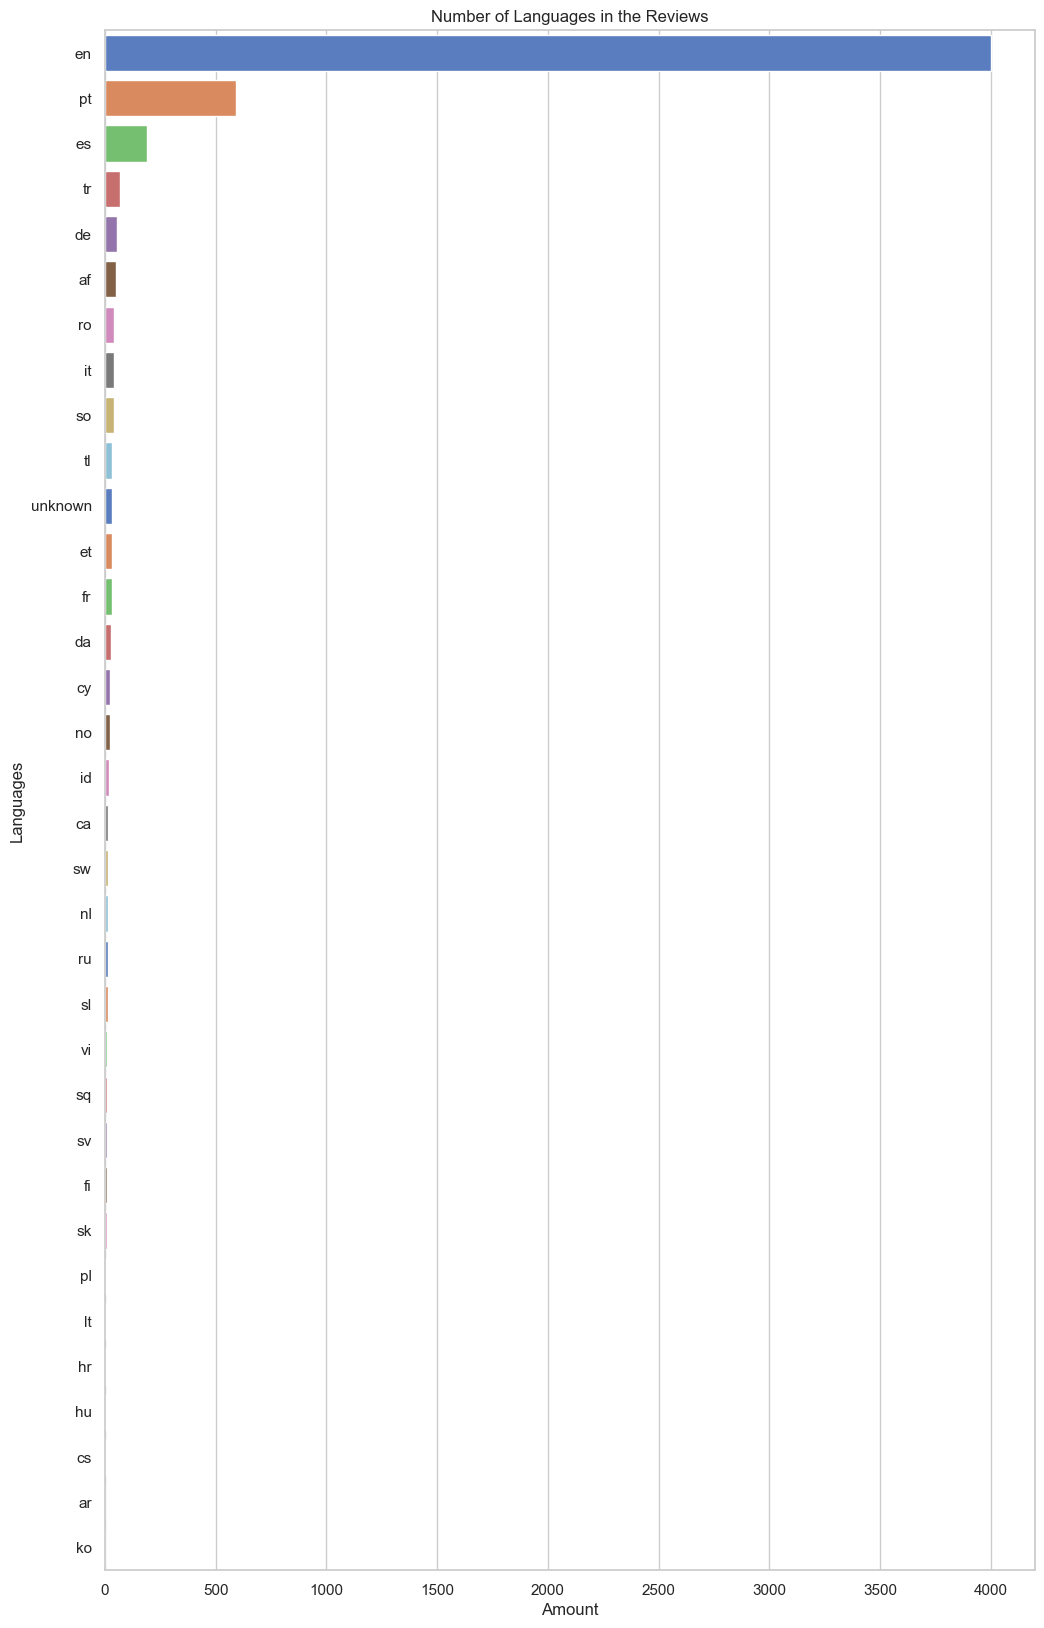

In [93]:
# language in reviews plot
plt.figure(figsize=(12, 20))
sns.barplot(x='Count', y='Language', data=sum_languages, legend=False, palette='muted')

plt.title('Number of Languages in the Reviews')
plt.xlabel('Amount')
plt.ylabel('Languages')
plt.show()

<h4> Game Reviews: Translation with ChatGPT 

In [ ]:
#translation of the reviews that aren't english with ChatGPT
import os
import openai
os.environ["OPENAI_API_KEY"]

In [ ]:
client = openai.OpenAI()

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content

In [ ]:
for index, row in reviews_data.iterrows():
    if row['Language'] == "en":
        reviews_data.at[index, 'Translation'] = row['Reviews']
    else:
        text = row['Reviews']
        language = row['Language']
        prompt = f"""Translate the given text from its language (abbreviation {language}) to english:
             {text}"""
        response = get_completion(prompt) 
        reviews_data.at[index, 'Translation'] = response

C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\matte\AppData\Roaming\Python\Python311\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

<h4> RPG Game Reviews: Sentiment Analysis, Word Embedding "game"

In [94]:
#filter the reviews for RPG games into a new data frame
rpg_reviews_data = reviews_data[reviews_data['Genres'].apply(lambda genres: 'RPG' in genres)]


C:\Users\matte\AppData\Local\Temp\ipykernel_8864\2626531313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rpg_reviews_data['polarity_score'] = rpg_reviews_data['Reviews'].apply(lambda x : polarity(x))


<Axes: >

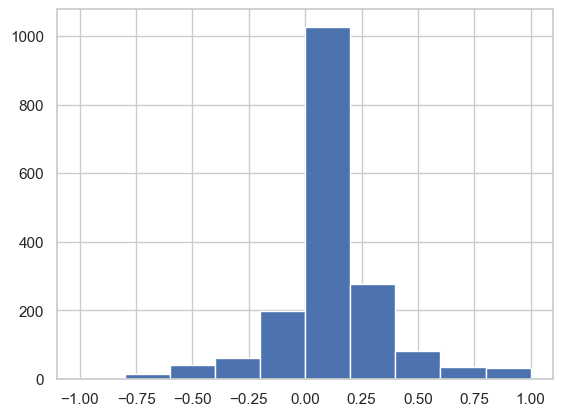

In [95]:
# sentiment analysis for rpg reviews
from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity

rpg_reviews_data['polarity_score'] = rpg_reviews_data['Reviews'].apply(lambda x : polarity(x))
rpg_reviews_data['polarity_score'].hist()

C:\Users\matte\AppData\Local\Temp\ipykernel_8864\1240253727.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rpg_reviews_data['polarity'] = rpg_reviews_data['polarity_score'].map(lambda x: sentiment(x))


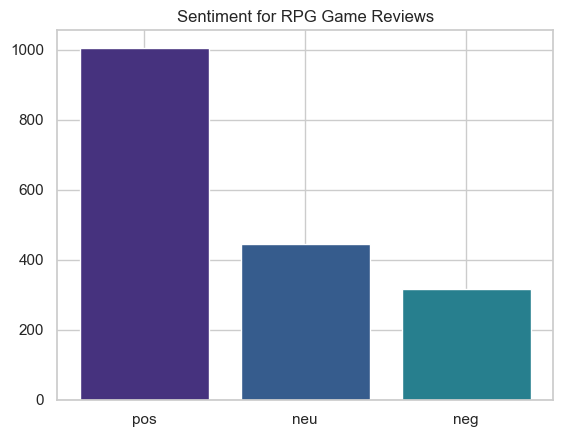

In [106]:
def sentiment(x):
    if x < 0:
        return 'neg'
    elif x == 0:
        return 'neu'
    else:
        return 'pos'
    
rpg_reviews_data['polarity'] = rpg_reviews_data['polarity_score'].map(lambda x: sentiment(x))
plt.bar(rpg_reviews_data.polarity.value_counts().index, rpg_reviews_data.polarity.value_counts(), color=sns.color_palette('viridis'))

plt.title('Sentiment for RPG Game Reviews')
plt.show()

In [97]:
#word embeddings with reviews of RPG games
import spacy
# disabling mflow autolog
import mlflow
mlflow.autolog(disable=True)

In [98]:
reviews = rpg_reviews_data['Reviews'].dropna().tolist()

class Corpus(object):
    def __init__(self, reviews):
        self.reviews = reviews
        self.nlp = spacy.blank("en")

    def clean_text(self, text):
        # Tokenize with spaCy
        tokens = [t.text.lower() for t in self.nlp(text)]
        # Remove punctuation and digits
        tokens = [token for token in tokens if token.isalpha()]
        return tokens

    def __iter__(self):
        for review in self.reviews:
            cleaned_tokens = self.clean_text(review)
            yield cleaned_tokens

# Create an instance of the Corpus class
documents = Corpus(reviews)

<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [99]:
dictionary = corpora.Dictionary(documents)
print(dictionary.token2id)

{'a': 0, 'actually': 1, 'after': 2, 'all': 3, 'also': 4, 'amazing': 5, 'an': 6, 'and': 7, 'away': 8, 'beating': 9, 'being': 10, 'best': 11, 'but': 12, 'can': 13, 'easily': 14, 'elden': 15, 'eperiences': 16, 'everything': 17, 'experienced': 18, 'explored': 19, 'exploring': 20, 'favorite': 21, 'feeling': 22, 'first': 23, 'for': 24, 'from': 25, 'game': 26, 'games': 27, 'gaming': 28, 'go': 29, 'greatest': 30, 'i': 31, 'imo': 32, 'important': 33, 'in': 34, 'is': 35, 'its': 36, 'just': 37, 'lose': 38, 'lot': 39, 'love': 40, 'malenia': 41, 'man': 42, 'motivation': 43, 'my': 44, 'of': 45, 'offer': 46, 'on': 47, 'one': 48, 'open': 49, 'playthrough': 50, 'playthroughs': 51, 'repeat': 52, 'replay': 53, 'replayability': 54, 'ring': 55, 'so': 56, 'solidified': 57, 'surprises': 58, 'takes': 59, 'the': 60, 'thing': 61, 'this': 62, 'time': 63, 'to': 64, 've': 65, 'very': 66, 'was': 67, 'which': 68, 'world': 69, 'you': 70, 'absolutely': 71, 'beautiful': 72, 'crazy': 73, 'do': 74, 'gets': 75, 'it': 76, 

In [100]:
model = gensim.models.Word2Vec(documents, min_count=100, window=5, vector_size=100)

In [101]:
print(model.wv["game"].shape)
model.wv["game"]

(100,)


array([ 0.04363486,  0.30487153,  0.02908465, -0.04828892,  0.17975737,
       -0.17129993,  0.0770728 ,  0.36447597, -0.15085457, -0.24621272,
       -0.11341423, -0.3382987 ,  0.01314059,  0.3514737 ,  0.00997165,
       -0.15741476,  0.11633773, -0.13942818,  0.08138244, -0.3774138 ,
        0.1528627 , -0.13643232,  0.27877137, -0.11482918,  0.01721607,
        0.01409976, -0.08727144, -0.02405666, -0.14692007, -0.06833057,
        0.20365503, -0.04599983,  0.21022746, -0.28498763, -0.27667886,
        0.22408184,  0.04259732, -0.05967935, -0.27396697, -0.20664999,
        0.14278682,  0.02589826, -0.09430346, -0.05139864,  0.02843231,
       -0.13168111, -0.33832374, -0.1897712 ,  0.23033755,  0.07409439,
        0.00898086, -0.08478081, -0.05989834, -0.13667545, -0.07791246,
       -0.14889446, -0.00348733, -0.02780978, -0.19219415, -0.038455  ,
        0.02795223, -0.0844641 ,  0.22345978,  0.12993412, -0.14056723,
        0.26574832,  0.19647329,  0.08489336, -0.20244904,  0.12

In [102]:
target_word = "game"

selected_words = [w[0] for w in model.wv.most_similar(positive=[target_word], topn=200)] + [target_word]
selected_words

['first',
 'everything',
 'out',
 'think',
 'into',
 'still',
 'series',
 'after',
 'through',
 'pretty',
 'though',
 'well',
 'system',
 'time',
 'just',
 'about',
 'was',
 'which',
 'had',
 'got',
 'it',
 'an',
 'so',
 'only',
 'better',
 'also',
 'will',
 'really',
 'not',
 'way',
 'with',
 'this',
 'interesting',
 'could',
 'at',
 'even',
 'what',
 'its',
 'play',
 'but',
 'lot',
 'my',
 'games',
 'being',
 'up',
 'because',
 'in',
 'would',
 'feel',
 'every',
 'get',
 'experience',
 'when',
 'most',
 'combat',
 'some',
 'ever',
 'make',
 'be',
 'story',
 'too',
 'or',
 'more',
 'from',
 'character',
 'bit',
 'very',
 'on',
 'were',
 'for',
 'is',
 'by',
 'world',
 'good',
 'that',
 'have',
 'than',
 'them',
 'all',
 'cool',
 'i',
 'they',
 'there',
 'best',
 'can',
 'one',
 'where',
 'how',
 'new',
 'made',
 'your',
 'like',
 'has',
 'fun',
 'many',
 'playing',
 'little',
 'to',
 'music',
 'if',
 'great',
 'actually',
 'characters',
 'go',
 'played',
 'bad',
 'does',
 'feels',
 't

In [103]:
from sklearn.manifold import TSNE

embeddings = [model.wv[w] for w in selected_words] + model.wv["game"]
mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

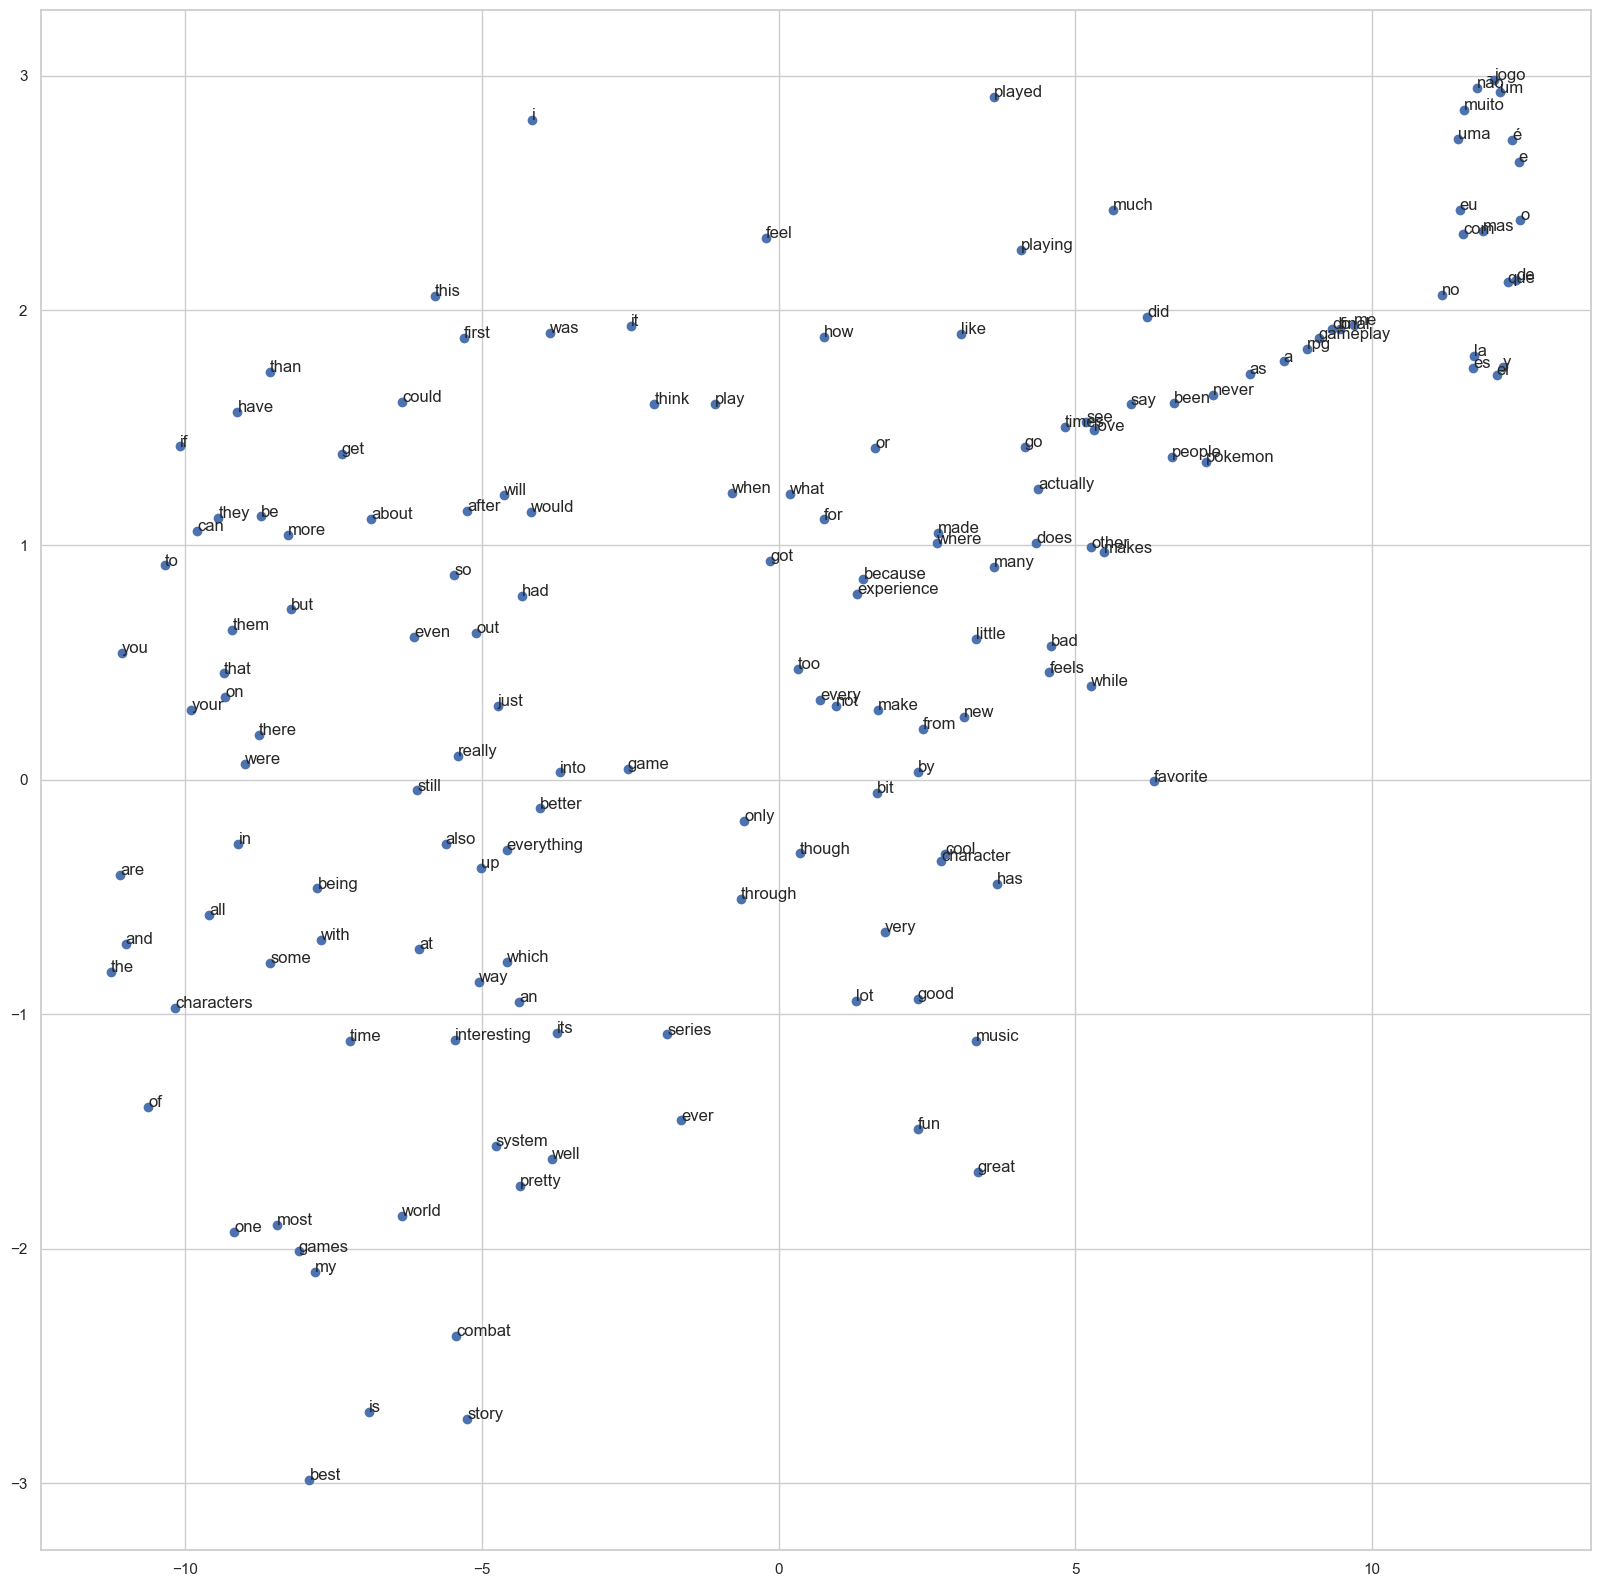

In [104]:
#word embeddings plot
plt.figure(figsize=(20,20))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))